# Food Scarcity Model using ASDM

By Matt Stammers (using Wang Zhao's excellent framework)

- Version 1.1

This is a great first training model to aide understanding about system dynamics and get used to manipulating such models in python

In [20]:
from ASDM.Engine import Structure
from ASDM.Utilities import plot_time_series
from IPython.display import Image
import numpy as np

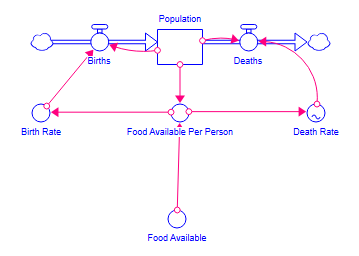

In [3]:
Image('Food_Model.png')

In [94]:
# Food Scarcity Model

class Food_Scarcity(Structure):
    def __init__(self):
        super(Food_Scarcity, self).__init__()
        self.add_stock("population", 8000000)
        self.add_flow("births", "birthRate*population", flow_from='birthRate', flow_to="population")        
        self.add_flow("deaths", "deathRate*population", flow_from='population', flow_to="deaths")
        self.add_aux("birthRate", "foodAvailablePerPerson*0.02")
        self.add_aux("foodAvailable/population", 5000000)
        self.add_aux("foodAvailablePerPerson", "foodAvailable/population")
        self.add_aux("deathRate", "foodAvailablePerPerson*0.01")            

In [95]:
food_model = Food_Scarcity()
food_model.clear_last_run()
food_model.simulate(simulation_time=20, dt=0.25)

Engine: adding element: population equation: 8000000
Engine: adding element: births equation: birthRate*population
Engine: adding element: deaths equation: deathRate*population
Engine: adding element: birthRate equation: foodAvailablePerPerson*0.02
Engine: adding element: foodAvailable equation: 5000000
Engine: adding element: foodAvailablePerPerson equation: foodAvailable/population
Engine: adding element: deathRate equation: foodAvailablePerPerson*0.01


In [96]:
food_model_outcome = food_model.export_simulation_result()
food_model_outcome

,population,births,birthRate,deaths,foodAvailable,foodAvailablePerPerson,deathRate
0,8000000.0,100000.0,0.012500,50000.0,5000000,0.625000,0.006250
1,8012500.0,100000.0,0.012480,50000.0,5000000,0.624025,0.006240
2,8025000.0,100000.0,0.012461,50000.0,5000000,0.623053,0.006231
3,8037500.0,100000.0,0.012442,50000.0,5000000,0.622084,0.006221
4,8050000.0,100000.0,0.012422,50000.0,5000000,0.621118,0.006211
...,...,...,...,...,...,...,...
76,8950000.0,100000.0,0.011173,50000.0,5000000,0.558659,0.005587
77,8962500.0,100000.0,0.011158,50000.0,5000000,0.557880,0.005579
78,8975000.0,100000.0,0.011142,50000.0,5000000,0.557103,0.005571
79,8987500.0,100000.0,0.011127,50000.0,5000000,0.556328,0.005563


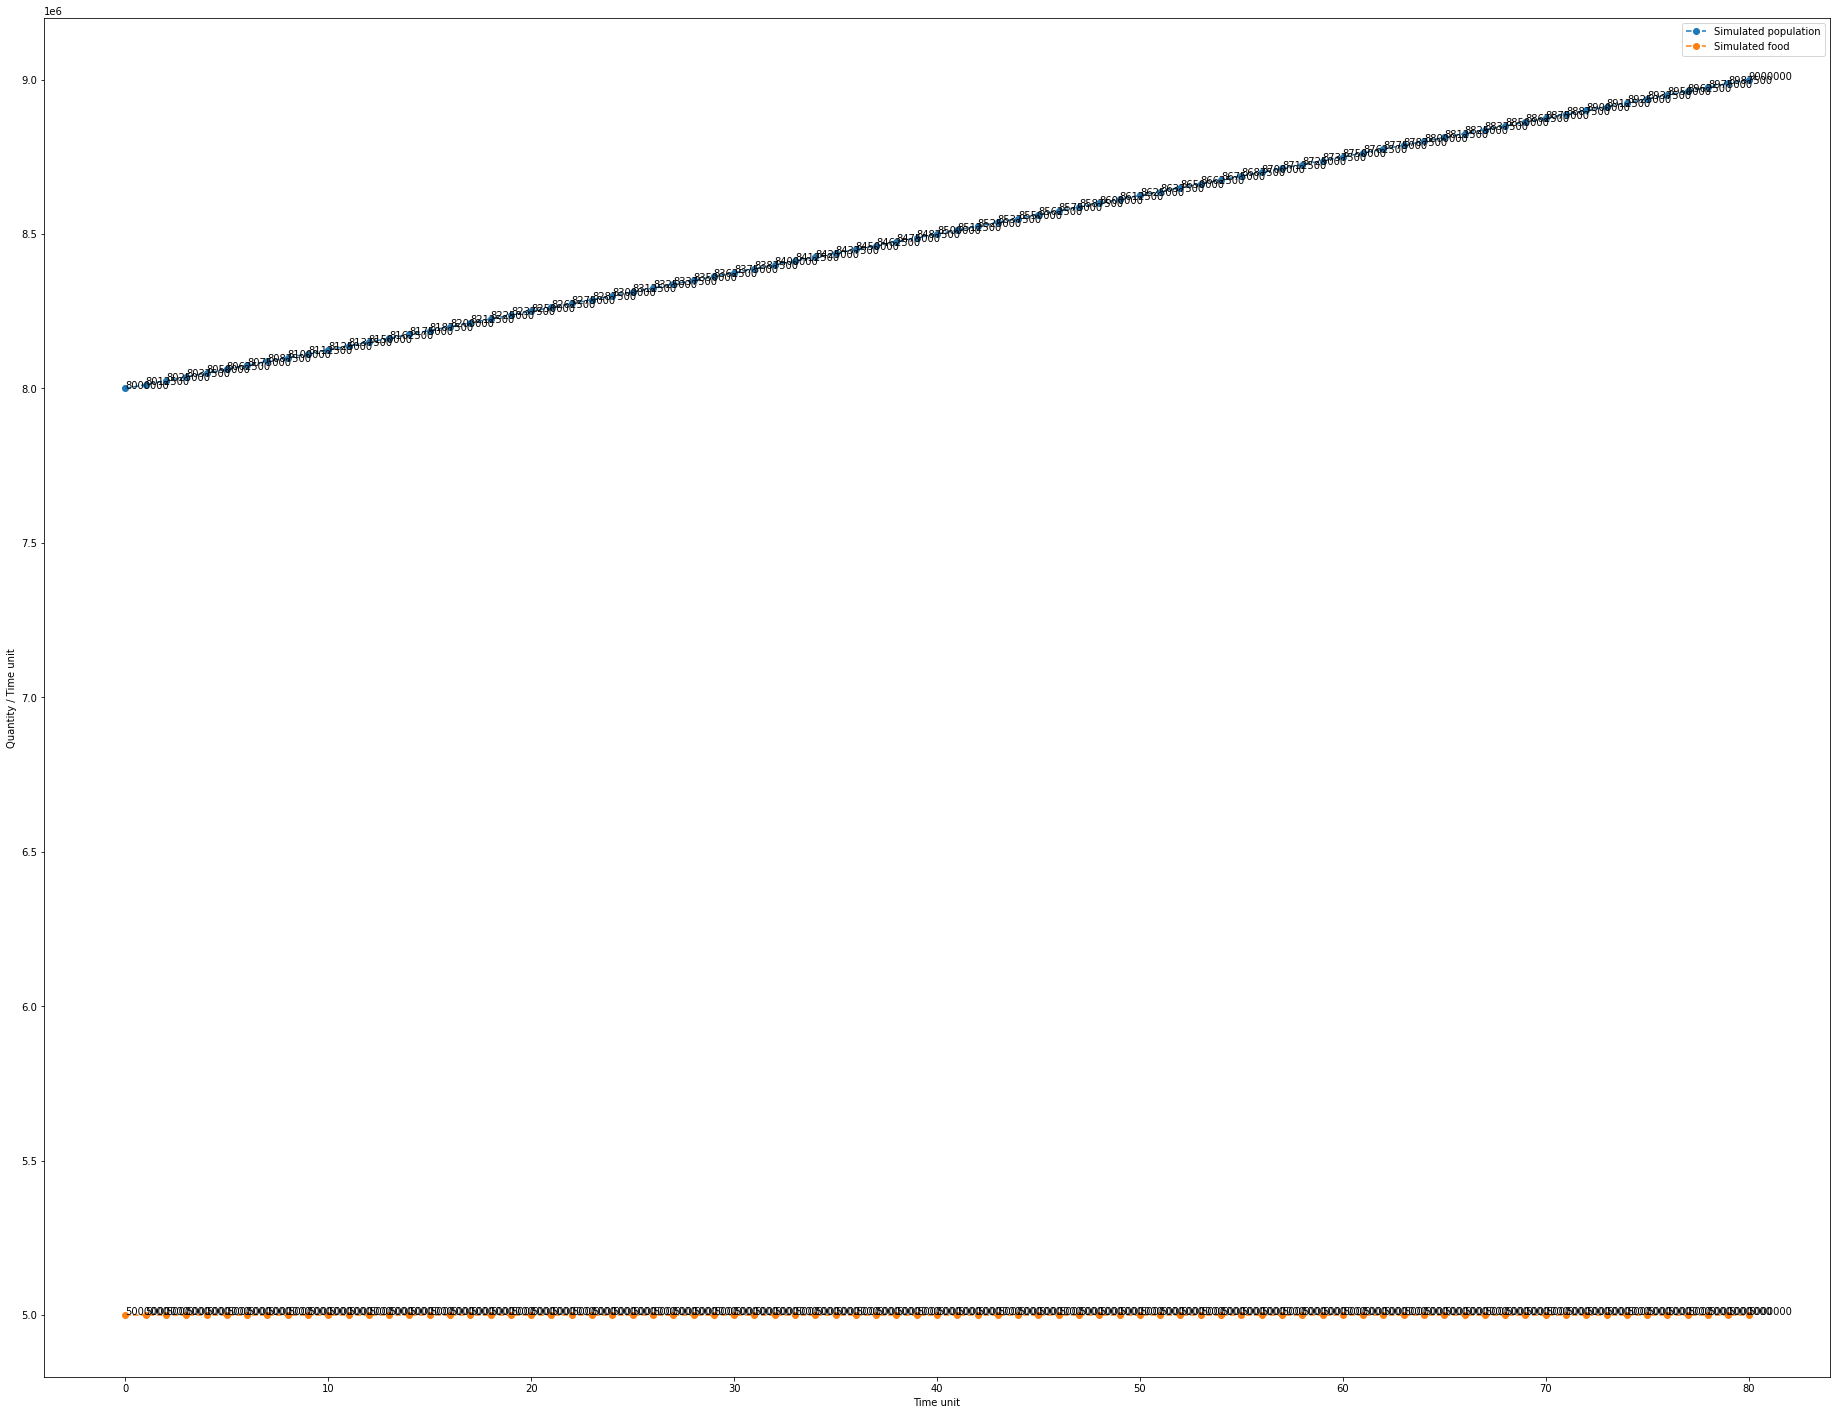

In [97]:
plot_time_series({
    "population":{"Simulated": food_model_outcome['population']},
    "food":{"Simulated": food_model_outcome['foodAvailable']},
}, separate_ax=False)